In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_mutual_info_score, silhouette_score, homogeneity_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_selection =    0    # 0 for wine, 1 for cancer

In [3]:
wine = pd.read_csv('data/wine.csv',sep=';')
bins = (2, 6.5, 8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins=bins,labels=group_names)
wine = wine.dropna()
wine_label_quality = LabelEncoder()
wine['quality'] = wine_label_quality.fit_transform(wine['quality'])

cancer = pd.read_csv('data/cancer.csv')
cancer = cancer.dropna()
cancer['class']=cancer['class'].map({4:1, 2:0})

if data_selection == 0:
    X = wine.drop('quality',axis=1)
    y = wine['quality']
    y_save = y
    dataset = 'Wine'
elif data_selection == 1:
    X = cancer.drop(['id','class'],axis=1)
    y = cancer['class'] 
    y_save = y
    dataset = 'Cancer'
else:
    print("0 for wine, 1 for cancer")

In [4]:
X = MinMaxScaler().fit_transform(X)

# K-Means

In [5]:
N = np.arange(2, 41, 1)

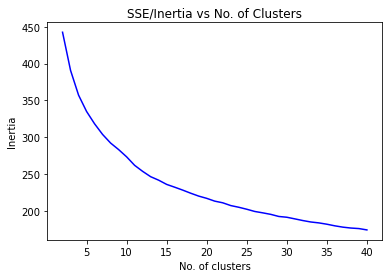

In [6]:
inertia =[]
for n in N:
    kmeans = KMeans(n_clusters=n,
                    max_iter=1000,
                    random_state=44).fit(X)
    
    inertia.append(kmeans.inertia_)
    
plt.figure()
plt.plot(N, inertia,'b')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.title('SSE/Inertia vs No. of Clusters')
plt.savefig('img/KMeans SSE vs clusters - '+dataset+'.png')
plt.show()

1. higher homogeneity is desired
2. silhouette of 1 is good -1 is bad 0 indicates overlapping clusters

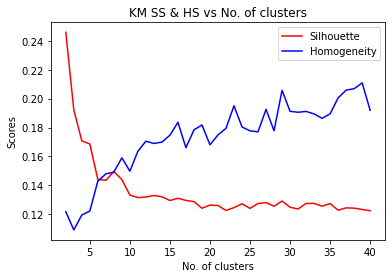

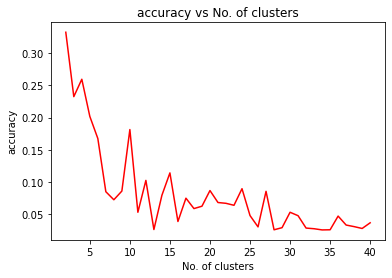

# of Clusters: 2 S: 0.24597062607977485 H: 0.1216937276964458
# of Clusters: 3 S: 0.19220341478603117 H: 0.10909781538921688
# of Clusters: 4 S: 0.1707613092852437 H: 0.11944565872911328
# of Clusters: 5 S: 0.16860659723306876 H: 0.1221581548498716
# of Clusters: 6 S: 0.1440881722270048 H: 0.1428479443407401
# of Clusters: 7 S: 0.14338768346027692 H: 0.14789960766205648
# of Clusters: 8 S: 0.1495248053037678 H: 0.14911716735756347
# of Clusters: 9 S: 0.14396224502948224 H: 0.15901476006754786
# of Clusters: 10 S: 0.13324598331533138 H: 0.14977446101883501
# of Clusters: 11 S: 0.13147541482724434 H: 0.1635612340824458
# of Clusters: 12 S: 0.1318782582857398 H: 0.17052090971242623
# of Clusters: 13 S: 0.1329348538923812 H: 0.16897212677326162
# of Clusters: 14 S: 0.1320593549062096 H: 0.16989510865743815
# of Clusters: 15 S: 0.1294557072293025 H: 0.17468019167554255
# of Clusters: 16 S: 0.13100549529906488 H: 0.18363228882821353
# of Clusters: 17 S: 0.1295339202296304 H: 0.16604016484019

In [7]:
S,H = [],[]
acc_array=[]
for n in N:
    km = KMeans(n_clusters=n,
                n_init=50,
                max_iter=1000,
                random_state=44,).fit(X)
    l = km.predict(X)
    S.append(silhouette_score(X, km.labels_, metric='euclidean'))
    H.append(homogeneity_score(y, km.labels_))
    acc_array.append(accuracy_score((1-l), y))

    
plt.figure()
plt.plot(N, S, 'r', label="Silhouette")
plt.plot(N, H, 'b', label="Homogeneity")
plt.legend()
plt.ylabel("Scores")
plt.xlabel('No. of clusters')
plt.title('KM SS & HS vs No. of clusters')
plt.savefig('img/KMeans SS&HS vs clusters - '+dataset+'.png')
plt.show()

plt.figure()
plt.plot(N, acc_array, 'r')
plt.xlabel('No. of clusters')
plt.ylabel('accuracy')
plt.title('accuracy vs No. of clusters')
plt.show()

for i in range(len(S)):
    print('# of Clusters: '+str(i+2)+' S: '+str(S[i])+' H: '+str(H[i]))

# Expectation Maximization

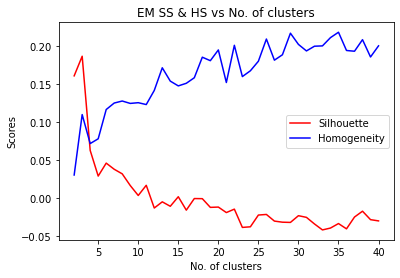

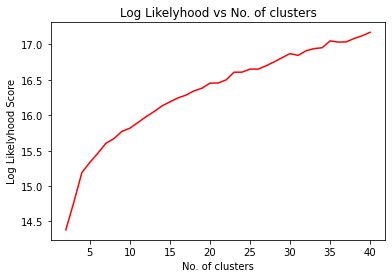

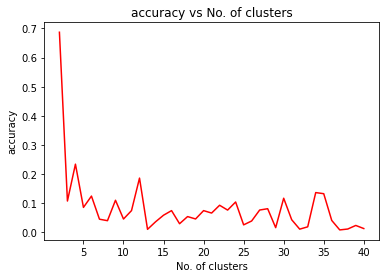

# of Clusters: 2 S: 0.1610951745801119 H: 0.030177157279579106
# of Clusters: 3 S: 0.18700891461536898 H: 0.10996231108973739
# of Clusters: 4 S: 0.06264090282079736 H: 0.07169175105741327
# of Clusters: 5 S: 0.028772717376008294 H: 0.07799532244010929
# of Clusters: 6 S: 0.0458673933290378 H: 0.11664553662116377
# of Clusters: 7 S: 0.03775711166291073 H: 0.125213281578083
# of Clusters: 8 S: 0.03170961671570407 H: 0.12787448238865545
# of Clusters: 9 S: 0.016310561412007114 H: 0.12471128763490566
# of Clusters: 10 S: 0.0031474038830102764 H: 0.1256595932751642
# of Clusters: 11 S: 0.016590148663677 H: 0.12320505899665377
# of Clusters: 12 S: -0.013405704277278283 H: 0.14184092430732695
# of Clusters: 13 S: -0.005246147163104964 H: 0.17175482667139136
# of Clusters: 14 S: -0.011122927130490637 H: 0.15415590320818864
# of Clusters: 15 S: 0.001494528214656774 H: 0.14784276553761033
# of Clusters: 16 S: -0.016229886820218718 H: 0.15128179939159556
# of Clusters: 17 S: -0.00090493706902370

In [10]:
S, H, L = [],[],[]
acc_array =[]
for n in N:
    gmm = GaussianMixture(n_components=n,
                          random_state=44,
                          max_iter=1000,
                          n_init=15).fit(X)
    l = gmm.predict(X)
    S.append(silhouette_score(X, l, metric='euclidean'))
    H.append(homogeneity_score(y, l))
    L.append(gmm.score(X))
    acc_array.append(accuracy_score((1-l), y))
    
plt.figure()
plt.plot(N, S, 'r', label="Silhouette")
plt.plot(N, H, 'b', label="Homogeneity")
plt.legend()
plt.title('EM SS & HS vs No. of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('Scores')
plt.savefig('img/EM SS&HS vs clusters - '+dataset+'.png')
plt.show()

plt.figure()
plt.plot(N, L, 'r')
plt.xlabel('No. of clusters')
plt.ylabel('Log Likelyhood Score')
plt.title('Log Likelyhood vs No. of clusters')
plt.savefig('img/EM Log vs clusters - '+dataset+'.png')
plt.show()

plt.figure()
plt.plot(N, acc_array, 'r')
plt.xlabel('No. of clusters')
plt.ylabel('accuracy')
plt.title('accuracy vs No. of clusters')
plt.show()
for i in range(len(S)):
    print('# of Clusters: '+str(i+2)+' S: '+str(S[i])+' H: '+str(H[i]))
